# Playstore Review Classification

Dataset: https://www.kaggle.com/lava18/google-play-store-apps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
dataset.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [5]:
# Dropping rows with null values
dataset = dataset.dropna()

In [6]:
dataset = dataset.reset_index(drop=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [8]:
dataset = dataset[['Translated_Review', 'Sentiment']]

In [9]:
dataset.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,Works great especially going grocery store,Positive
3,Best idea us,Positive
4,Best way,Positive


## Data Preprocessing

In [10]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 37427):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Translated_Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()

In [14]:
# Encoding the target
y = encoder.fit_transform(dataset.iloc[:, 1])

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Model Building

### Naive Bayes

In [16]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
# Predicting the Test set results
y_pred_nb = nb.predict(X_test)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred_nb))

[[ 930  562  195]
 [  55  970   35]
 [ 941 1866 1932]]


In [19]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.48      0.55      0.51      1687
           1       0.29      0.92      0.44      1060
           2       0.89      0.41      0.56      4739

   micro avg       0.51      0.51      0.51      7486
   macro avg       0.55      0.62      0.50      7486
weighted avg       0.71      0.51      0.53      7486



In [20]:
print(accuracy_score(y_test, y_pred_nb))

0.5118888592038472


### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
# Predicting the Test set results
y_pred_rf = rf.predict(X_test)

In [24]:
# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

[[1339   65  283]
 [  42  897  121]
 [ 171  100 4468]]


In [25]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1687
           1       0.84      0.85      0.85      1060
           2       0.92      0.94      0.93      4739

   micro avg       0.90      0.90      0.90      7486
   macro avg       0.87      0.86      0.87      7486
weighted avg       0.89      0.90      0.89      7486



In [26]:
print(accuracy_score(y_test,y_pred_rf))

0.8955383382313652


### Xgboost

In [27]:
from xgboost import XGBClassifier

E:\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
E:\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [28]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
# Predicting the Test set results
y_pred_xgb = xgb.predict(X_test)

In [30]:
# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_xgb))

[[1282  103  302]
 [  19  952   89]
 [ 128  149 4462]]


In [31]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1687
           1       0.79      0.90      0.84      1060
           2       0.92      0.94      0.93      4739

   micro avg       0.89      0.89      0.89      7486
   macro avg       0.87      0.87      0.86      7486
weighted avg       0.90      0.89      0.89      7486



In [32]:
print(accuracy_score(y_test,y_pred_xgb))

0.8944696767298959


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
# Predicting the Test set results
y_pred_lreg = lreg.predict(X_test)

In [36]:
# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_lreg))

[[1366   77  244]
 [  40  925   95]
 [ 152  122 4465]]


In [37]:
print(classification_report(y_test,y_pred_lreg))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1687
           1       0.82      0.87      0.85      1060
           2       0.93      0.94      0.94      4739

   micro avg       0.90      0.90      0.90      7486
   macro avg       0.88      0.87      0.87      7486
weighted avg       0.90      0.90      0.90      7486



In [38]:
print(accuracy_score(y_test,y_pred_lreg))

0.9024846379909164


## Hyper-parameters Tunning

In [39]:
rf = RandomForestClassifier()

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [41]:
n_estimators = range(100,1000,50)

hyperF = dict(n_estimators = n_estimators)

random_forest = RandomizedSearchCV(rf, hyperF, cv = 3, verbose = 10, 
                      n_jobs = -1)
random_forest.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 49.3min remaining: 28.5min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 54.3min remaining: 16.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 58.0min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 58.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': range(100, 1000, 50)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [42]:
random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=950, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
random_forest.best_score_

0.8951938812998897

In [44]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=950, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=950, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
# Predicting the Test set results
y_pred_rf = rf.predict(X_test)

In [47]:
# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

[[1316   58  313]
 [  21  909  130]
 [  84   80 4575]]


In [48]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1687
           1       0.87      0.86      0.86      1060
           2       0.91      0.97      0.94      4739

   micro avg       0.91      0.91      0.91      7486
   macro avg       0.90      0.87      0.88      7486
weighted avg       0.91      0.91      0.91      7486



In [49]:
print(accuracy_score(y_test,y_pred_rf))

0.9083622762489981


In [44]:
# define models and parameters
lreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
grid_search = GridSearchCV(estimator=lreg, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [45]:
grid_result.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
grid_result.best_score_

0.8967302361310577

In [47]:
lreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
lreg.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
# Predicting the Test set results
y_pred_lreg = lreg.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred_lreg))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1687
           1       0.82      0.87      0.85      1060
           2       0.93      0.94      0.94      4739

   micro avg       0.90      0.90      0.90      7486
   macro avg       0.88      0.87      0.87      7486
weighted avg       0.90      0.90      0.90      7486



In [51]:
print(accuracy_score(y_test,y_pred_lreg))

0.9024846379909164


## Saving Model

In [52]:
import pickle

In [83]:
pickle.dump(rf, open('rf_clf_model.pkl', 'wb'))

In [55]:
pickle.dump(lreg, open('lreg_clf_model.pkl', 'wb'))

In [56]:
pickle.dump(cv, open('cv.pkl', 'wb'))

In [57]:
encoder.inverse_transform([0,1,2])

array(['Negative', 'Neutral', 'Positive'], dtype=object)

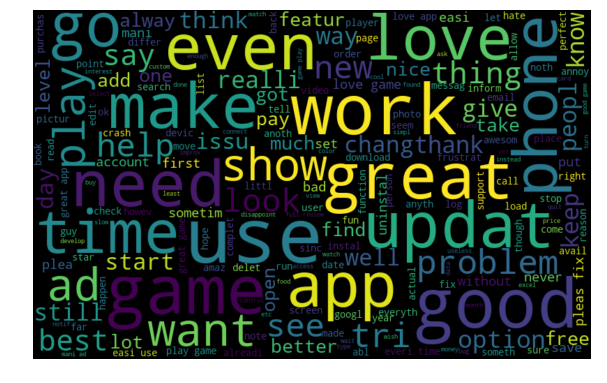

In [58]:
all_words = ' '.join([text for text in corpus])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()